<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/Summer2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/2017_concat/Concat_2017.csv"
df = pd.read_csv(path)
summer_index = set()

Mounted at /content/drive


In [ ]:
from sklearn import metrics

In [ ]:
for i in range(0,len(df),24*60//5):
  month = int(df.loc[i]["time"][5:7])

  if (6 <= month <= 8):
    summer_index.add(i)

all_index = list()
for i in summer_index:
  for j in range(24*60//5):
    all_index.append(i+j)

x = list()
for i in all_index:
  x.append(df.loc[i])
df2 = pd.DataFrame()
df2 = df2.append(x)

In [ ]:
cols = list(df2.columns)
cols.remove("time")
for col in cols:
  if sum(df2[col].mean()== df2[col]) == len(df2):
    values = df2[col]
    values.iloc[0] += 10 ** -10
    df2[col] = values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
df2.drop(columns="time",axis=1,inplace=True)
cols = list(df2.columns)
arr = np.array(df2)


In [ ]:
corr = np.corrcoef(arr,rowvar=False)

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform

corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)

In [ ]:
from collections import defaultdict

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

24

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

-0.24406455700960153

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

-0.05171688767461815

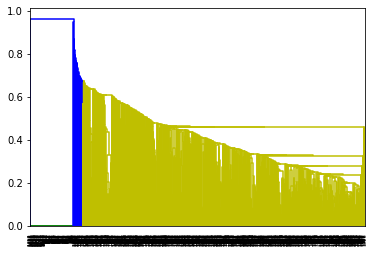

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:3 len:1253
cluster:21 len:1
cluster:1 len:189
cluster:7 len:1
cluster:8 len:1
cluster:12 len:1
cluster:19 len:1
cluster:24 len:1
cluster:20 len:1
cluster:14 len:1
cluster:2 len:3
cluster:18 len:1
cluster:23 len:1
cluster:22 len:1
cluster:15 len:1
cluster:4 len:1
cluster:6 len:1
cluster:16 len:1
cluster:11 len:1
cluster:5 len:1
cluster:9 len:1
cluster:10 len:1
cluster:13 len:1
cluster:17 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SummerSingleClusterCoord_2017.csv")

In [ ]:
import plotly.express as px
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SummerSingleClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.9, criterion='distance')
labels.max()

65

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.14583938837487265

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.17281874032927816

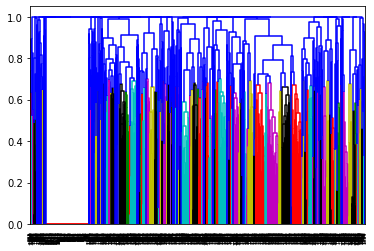

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:125 len:36
cluster:165 len:26
cluster:211 len:26
cluster:198 len:18
cluster:175 len:46
cluster:214 len:13
cluster:75 len:2
cluster:24 len:1
cluster:220 len:10
cluster:25 len:189
cluster:207 len:15
cluster:89 len:1
cluster:91 len:10
cluster:43 len:9
cluster:76 len:29
cluster:147 len:33
cluster:199 len:12
cluster:146 len:12
cluster:128 len:19
cluster:60 len:11
cluster:173 len:37
cluster:167 len:2
cluster:171 len:49
cluster:140 len:3
cluster:88 len:15
cluster:139 len:16
cluster:130 len:15
cluster:193 len:8
cluster:73 len:25
cluster:172 len:14
cluster:26 len:6
cluster:72 len:8
cluster:96 len:5
cluster:95 len:4
cluster:5 len:2
cluster:74 len:20
cluster:192 len:2
cluster:169 len:42
cluster:127 len:11
cluster:42 len:2
cluster:90 len:21
cluster:179 len:8
cluster:224 len:3
cluster:170 len:11
cluster:182 len:10
cluster:108 len:2
cluster:16 len:5
cluster:101 len:13
cluster:221 len:2
cluster:136 len:2
cluster:14 len:1
cluster:138 len:9
cluster:183 len:16
cluster:162 len:14
cluster:64 len:1

In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SummerCompleteClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SummerCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.9, criterion='distance')
labels.max()

24

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.07104927151792959

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.10453494944916293

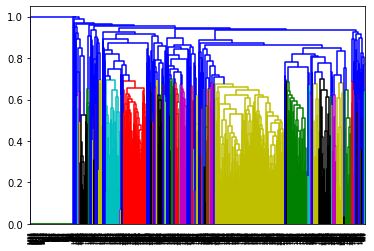

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:21 len:668
cluster:10 len:48
cluster:17 len:206
cluster:7 len:1
cluster:1 len:189
cluster:20 len:142
cluster:15 len:25
cluster:22 len:15
cluster:11 len:16
cluster:23 len:16
cluster:14 len:14
cluster:19 len:57
cluster:13 len:12
cluster:24 len:28
cluster:18 len:15
cluster:9 len:2
cluster:6 len:2
cluster:2 len:1
cluster:16 len:2
cluster:12 len:2
cluster:4 len:1
cluster:5 len:1
cluster:8 len:2
cluster:3 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SummerWeightedClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SummerWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

31

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

-0.20996747814350492

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

-0.009154971835461488

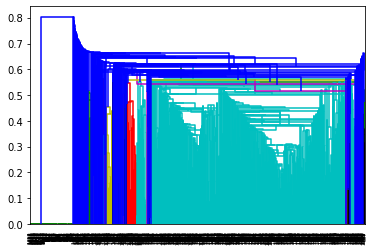

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:2 len:1248
cluster:30 len:1
cluster:1 len:189
cluster:3 len:1
cluster:25 len:1
cluster:6 len:1
cluster:21 len:1
cluster:9 len:1
cluster:31 len:1
cluster:24 len:1
cluster:19 len:1
cluster:5 len:1
cluster:29 len:1
cluster:13 len:1
cluster:23 len:1
cluster:27 len:1
cluster:7 len:1
cluster:14 len:1
cluster:26 len:1
cluster:10 len:1
cluster:18 len:1
cluster:15 len:1
cluster:4 len:1
cluster:12 len:1
cluster:20 len:1
cluster:17 len:1
cluster:8 len:1
cluster:11 len:1
cluster:22 len:1
cluster:16 len:1
cluster:28 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.83, criterion='distance')
labels.max()

46

In [ ]:
metrics.silhouette_score(corr, labels, metric='euclidean')

0.16311662482086595

In [ ]:
metrics.silhouette_score(dissimilarity, labels, metric='euclidean')

0.18458430740753837

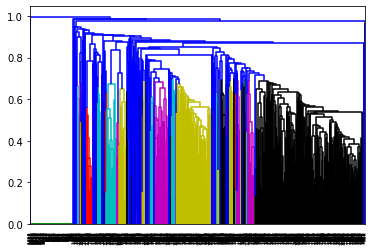

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:40 len:651
cluster:18 len:38
cluster:24 len:44
cluster:25 len:45
cluster:38 len:290
cluster:46 len:1
cluster:1 len:189
cluster:36 len:17
cluster:19 len:35
cluster:8 len:16
cluster:22 len:10
cluster:39 len:14
cluster:32 len:7
cluster:27 len:7
cluster:41 len:2
cluster:16 len:3
cluster:37 len:24
cluster:9 len:15
cluster:34 len:10
cluster:43 len:1
cluster:4 len:5
cluster:26 len:4
cluster:29 len:2
cluster:42 len:1
cluster:35 len:4
cluster:12 len:1
cluster:14 len:1
cluster:17 len:2
cluster:21 len:6
cluster:23 len:1
cluster:2 len:1
cluster:28 len:2
cluster:5 len:1
cluster:31 len:2
cluster:7 len:2
cluster:44 len:1
cluster:15 len:1
cluster:45 len:1
cluster:33 len:2
cluster:10 len:1
cluster:11 len:1
cluster:13 len:1
cluster:6 len:1
cluster:30 len:1
cluster:20 len:1
cluster:3 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/SummerAverageClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/SummerAverageClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()